In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\akash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Declaring Global Parameters

In [2]:
a = 15 # FORS Tree Height
# k = 10 # FORS Tree Number
val_arr = []

In [3]:
parameters = {
    "128S" : {
        "n":16,
        "h":66,
        "d":11,
        "k":9,
        "w":128,
        "a":13
    },
    "128F" : {
        "n":16,
        "h":63,
        "d":21,
        "k":19,
        "w":16,
        "a":9
    },
    "192S" : {
        "n":24,
        "h":63,
        "d":11,
        "k":13,
        "w":128,
        "a":15
    },
    "192F" : {
        "n":24,
        "h":63,
        "d":21,
        "k":30,
        "w":16,
        "a":9
    },
    "256S" : {
        "n":32,
        "h":66,
        "d":11,
        "k":19,
        "w":64,
        "a":14
    },
    "256F" : {
        "n":32,
        "h":64,
        "d":16,
        "k":34,
        "w":16,
        "a":10
    },
}

m = b"No one knows the reason for all this, but it is probably quantum. - Pyramids, Terry Pratchett (1989)"

# SPHINCS+ 

In [4]:
from package.sphincs import Sphincs
from package.sphincsc import SphincsC

In [5]:
def SphincsUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = Sphincs()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    sphincsc.set_hash_fun(0)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except:
        
        print(name + " Failed")
    
    print("-"*50, "\n")

    return di


In [6]:
def SphincsCUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = SphincsC()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    sphincsc.set_cf(cf)
    sphincsc.set_hash_fun(0)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except Exception as e:
        
        print(name + " Failed")
        print(e)
    
    print("-"*50, "\n")

    return di


## SPHINCS+128S

In [7]:
models = ["SPHINCS+", "SPHINCS+C1", "SPHINCS+C2", "SPHINCS+C3", "SPHINCS+C4"]
parameter_names = list(parameters.keys())

for cf, name in enumerate(models):
    if cf == 0:
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsUtil(**param, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
            print("-"*50, "\n")
    else:
        if name.endswith("F"):
            continue
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsCUtil(**param, cf=cf, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
    

SPHINCS+ 128S
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.13098788261413574
Time Taken to Sign 2.9957692623138428
Signature Size 9248 bytes
Time Taken to Verify 0.010970592498779297
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 128F
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.017496824264526367
Time Taken to Sign 0.5441234111785889
Signature Size 15824 bytes
Time Taken to Verify 0.02194046974182129
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 192S
Secret Key Size:  96
Public Key Size:  48
Time Taken to Generate Keys 0.09532451629638672
Time Taken to Sign 9.61896276473999
Signature Size 19800 bytes
Time Taken to Verify 0.015154361724853516
Is signature correct ?  False
-------------------------------------------------- 

-----------------

Time Taken to Sign 2.6725287437438965
Signature Size 28196 bytes
Time Taken to Verify 0.025931835174560547
Is signature correct ?  True
-------------------------------------------------- 

SPHINCS+C4 256S
Secret Key Size:  128
Public Key Size:  64
Time Taken to Generate Keys 0.5658843517303467
Time Taken to Sign 274.66280341148376
Signature Size 23845 bytes
Time Taken to Verify 0.0910952091217041
Is signature correct ?  True
-------------------------------------------------- 

SPHINCS+C4 256F
Secret Key Size:  128
Public Key Size:  64
Time Taken to Generate Keys 0.05960965156555176
Time Taken to Sign 2.5097243785858154
Signature Size 41890 bytes
Time Taken to Verify 0.02692556381225586
Is signature correct ?  True
-------------------------------------------------- 



In [8]:
df = pd.DataFrame(val_arr)

In [9]:
df.to_csv("result-SHA512.csv", encoding='utf-8', index=False)

In [10]:
df.head(len(val_arr))

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name
0,64,32,0.130988,9248,2.995769,0.010971,SPHINCS+ 128S
1,64,32,0.017497,15824,0.544123,0.021940,SPHINCS+ 128F
2,96,48,0.095325,19800,9.618963,0.015154,SPHINCS+ 192S
3,96,48,0.024516,34440,0.813909,0.028923,SPHINCS+ 192F
4,128,64,0.249583,34848,9.091089,0.019948,SPHINCS+ 256S
5,128,64,0.061472,48352,1.710825,0.029919,SPHINCS+ 256F
6,64,32,0.564196,6245,195.676411,0.096293,SPHINCS+C1 128S
7,64,32,0.017473,14689,0.711847,0.021940,SPHINCS+C1 128F
8,96,48,0.422646,13381,239.600836,0.135259,SPHINCS+C1 192S
9,96,48,0.026551,32725,1.048340,0.031954,SPHINCS+C1 192F


In [11]:
df = df.round(3) 

In [12]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label, colormap='viridis'):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(16, 10))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['g', 'y', 'm', 'b', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            ax.text((x + bar_width / 2)-0.4, y, str(y), ha='center', va='bottom')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_label)
    ax.legend()


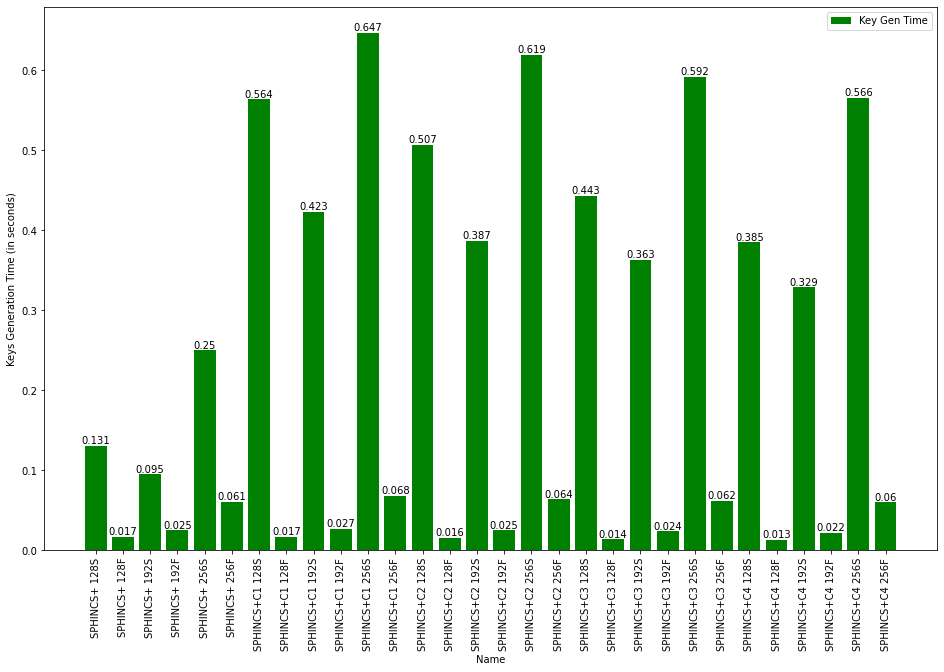

In [13]:
plot_bar_multi_columns(df, 'Name', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

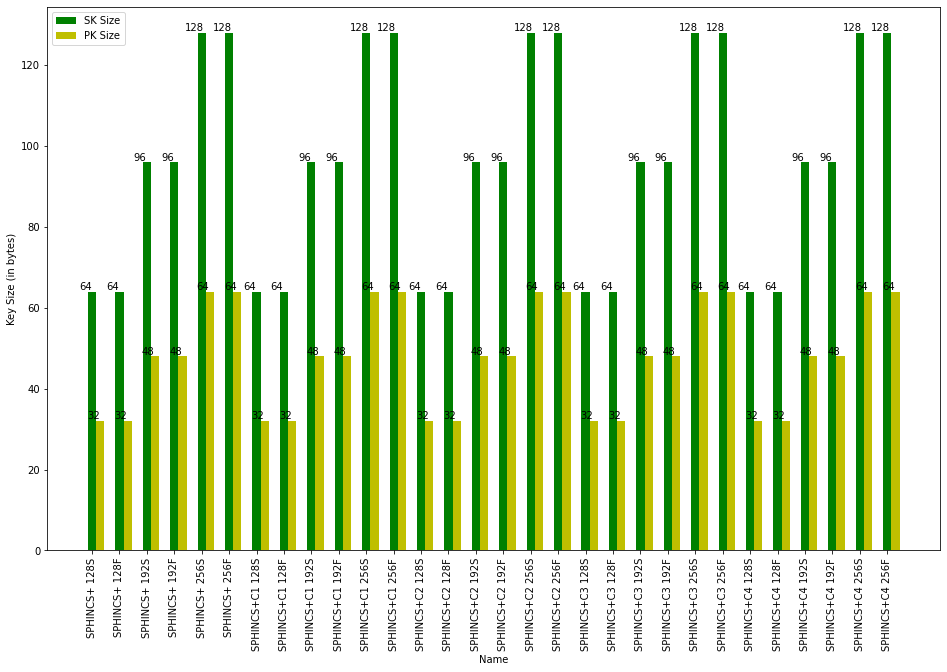

In [14]:
plot_bar_multi_columns(df, 'Name', ["SK Size","PK Size"], "Key Size (in bytes)")

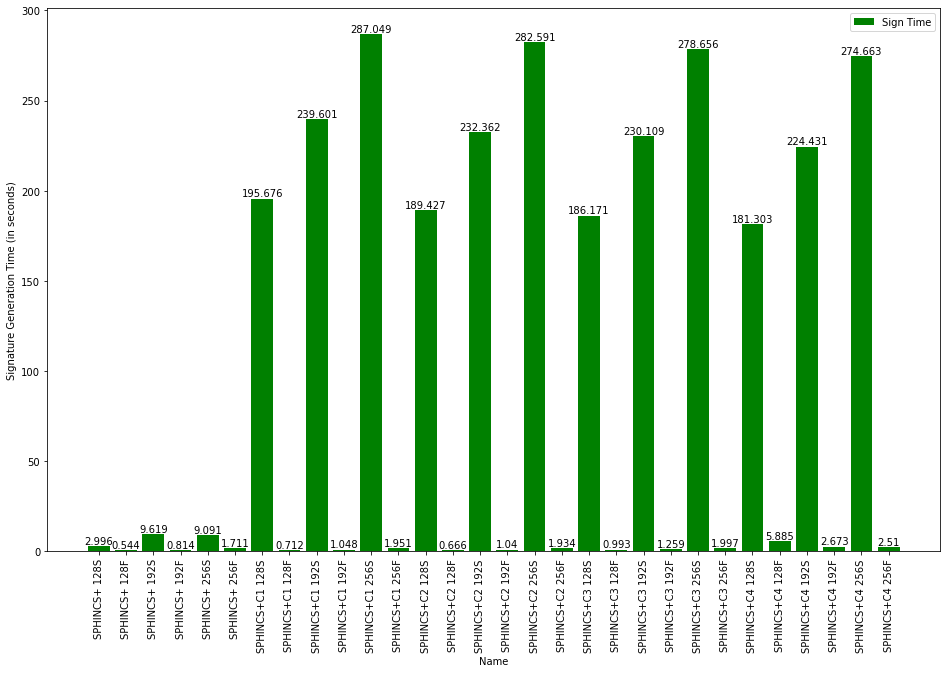

In [15]:
plot_bar_multi_columns(df, 'Name', ["Sign Time"], "Signature Generation Time (in seconds)")

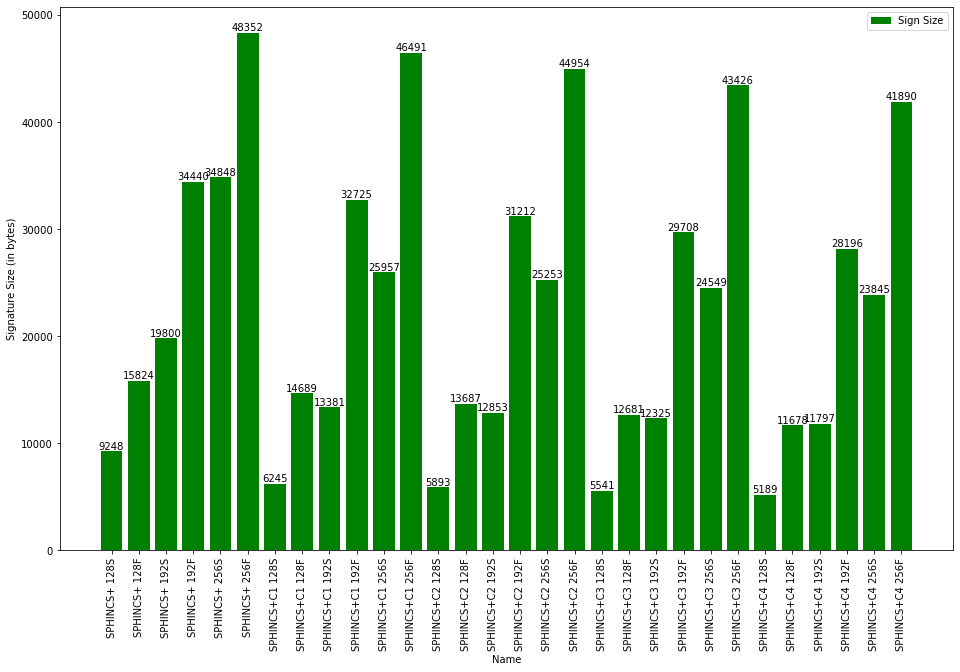

In [16]:
plot_bar_multi_columns(df, 'Name', ["Sign Size"], "Signature Size (in bytes)")

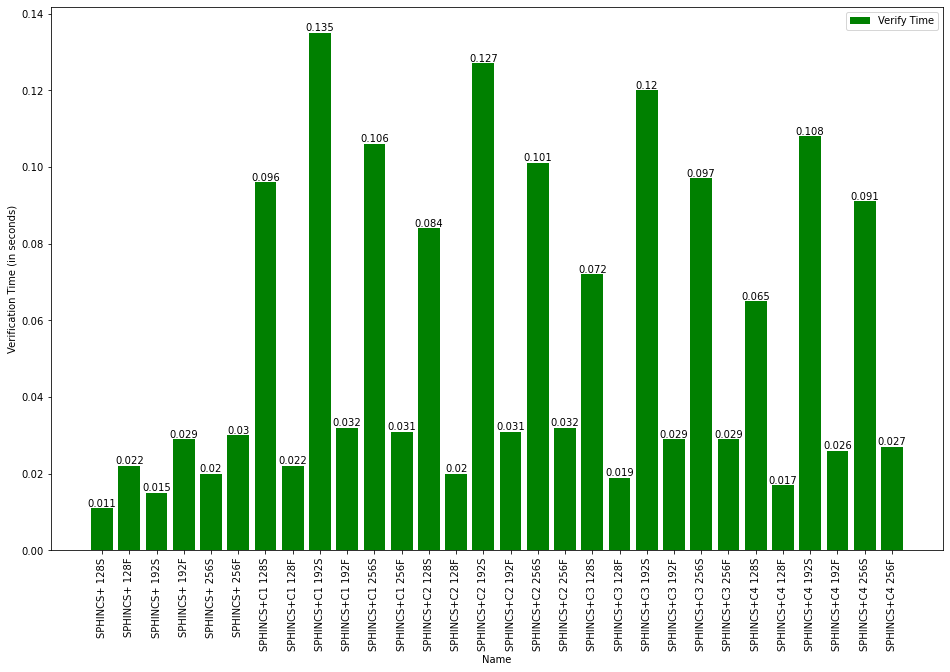

In [17]:
plot_bar_multi_columns(df, 'Name', ["Verify Time"], "Verification Time (in seconds)")

In [18]:
df2 = df.sort_values(by=['Sign Size'])

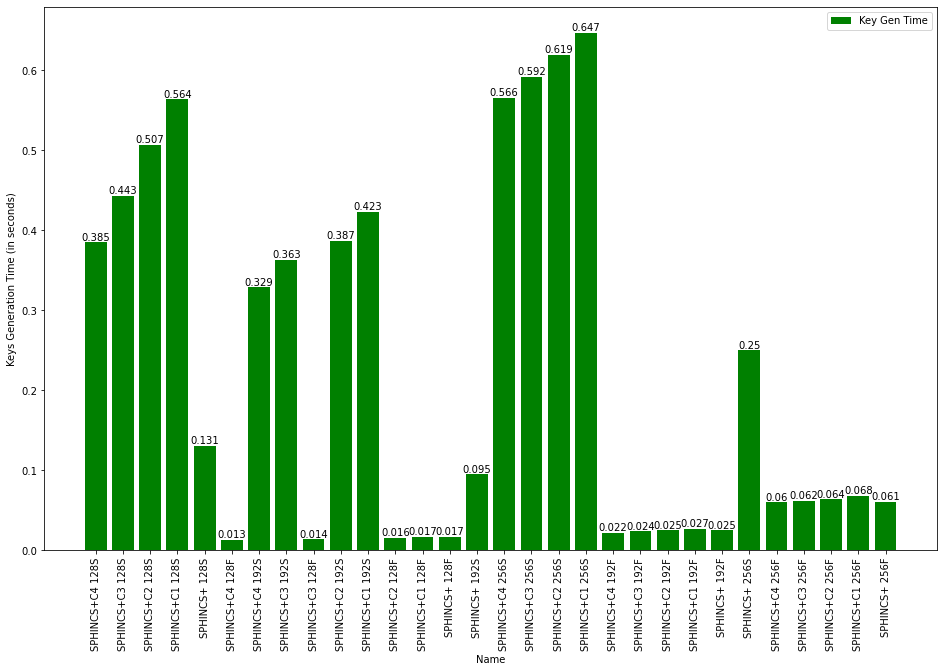

In [19]:
plot_bar_multi_columns(df2, 'Name', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

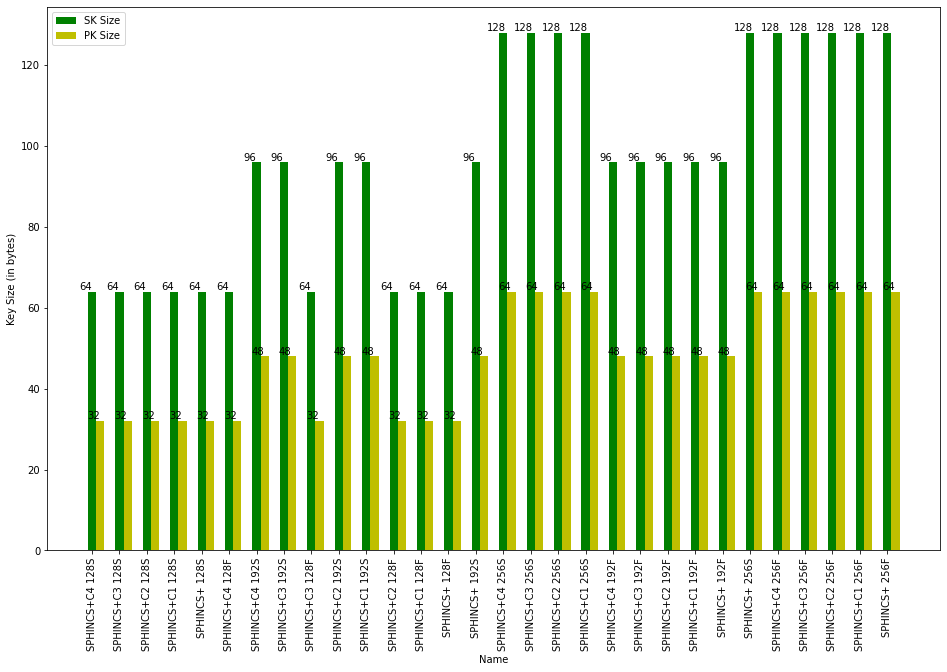

In [20]:
plot_bar_multi_columns(df2, 'Name', ["SK Size","PK Size"], "Key Size (in bytes)")

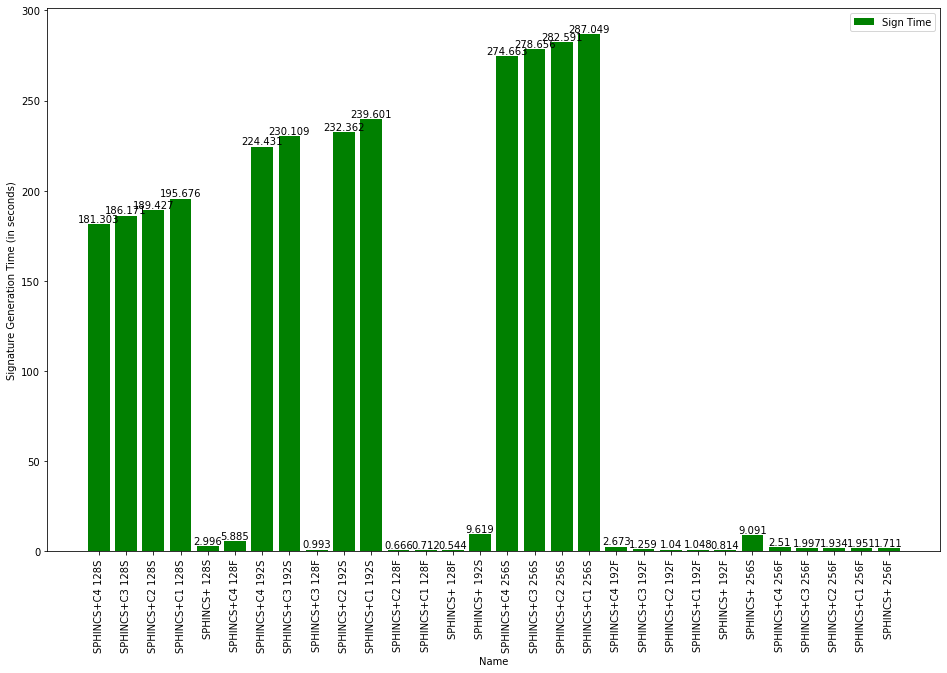

In [21]:
plot_bar_multi_columns(df2, 'Name', ["Sign Time"], "Signature Generation Time (in seconds)")

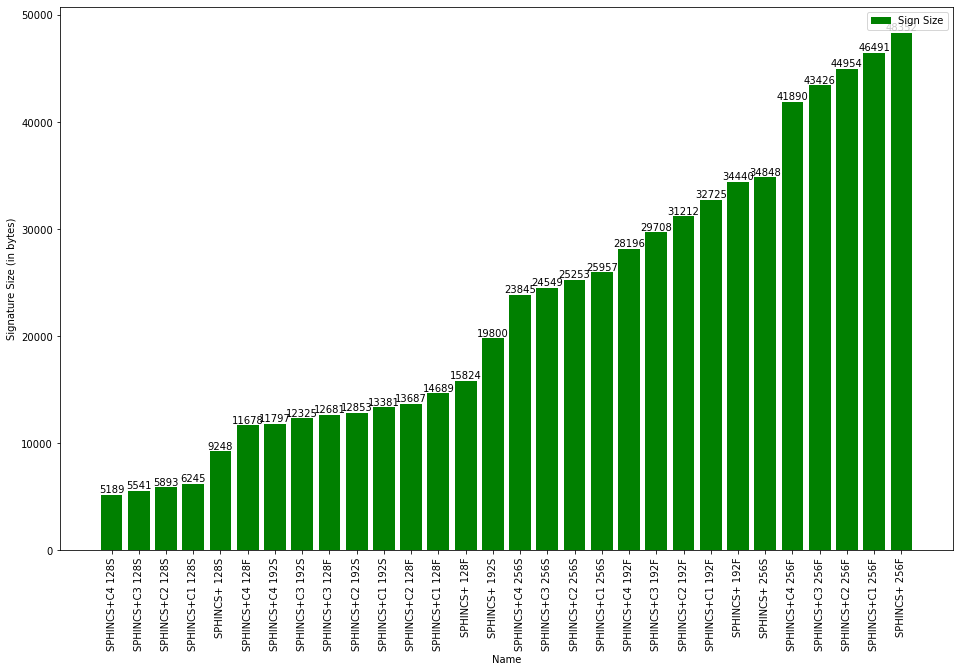

In [22]:
plot_bar_multi_columns(df2, 'Name', ["Sign Size"], "Signature Size (in bytes)")

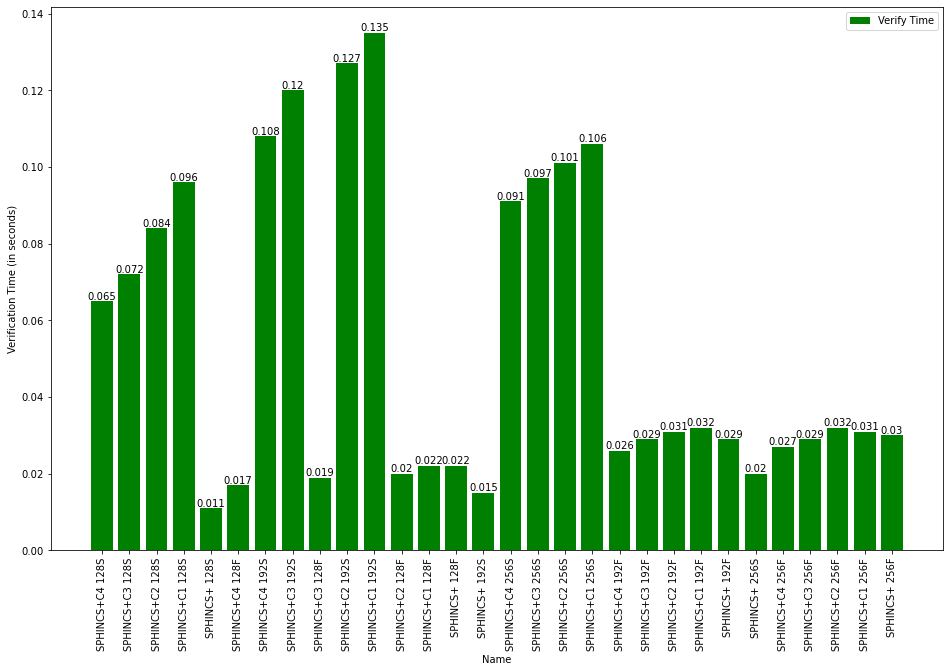

In [23]:
plot_bar_multi_columns(df2, 'Name', ["Verify Time"], "Verification Time (in seconds)")